# Predicting Vehicle Prices Using Regression Models

## **Objectives**  
The primary goal of this project is to develop a robust regression model to predict used car prices for a reseller based on various listed features and specifications. In addition to predicting prices, the project focuses on identifying feature importance and mitigating overfitting through the application of regularisation techniques.

There can be several business objectives for this, such as:

* **Price Prediction**: Model car prices based on features like mileage, fuel type, and performance.
* **Market Analysis**: Explore trends and preferences in the used car market, by type, region, or other metrics.
* **Feature Importance**: Identify the most important factors influencing car prices (e.g., fuel type, mileage, age).

### **Tasks Overview**
The data pipeline for this task involves the following steps:  
1. **Dataset Overview**   
2. **Data Preprocessing**
3. **Data Visualisation & Exploration**
4. **Model Building**
3. **Regularisation**

## **1 Data Understanding**

| **Variable** | **Description** |
--------|--------------|
| `make_model` | The brand and model of the vehicle (e.g., 'Audi A1'). |
| `body_type` | The body style of the vehicle, such as Sedan, Compact, or Station Wagon. |
| `price`  | The listed price of the car in currency. |
| `vat`  | Indicates the VAT status for the vehicle's price (e.g., VAT deductible, Price negotiable). |
| `km` | The total mileage (in kilometers) of the vehicle, indicating its usage. |
| `Type` | Condition of the vehicle, whether it's 'Used' or 'New'.|
| `Fuel` | Type of fuel the vehicle uses, such as 'Diesel', 'Benzine', etc. |
| `Gears` | The number of gears in the vehicle's transmission. |
| `Comfort_Convenience` | Comfort and convenience features, such as 'Air conditioning', 'Leather steering wheel', 'Cruise control', and more. |
| `Entertainment_Media` | Media features available in the vehicle, including 'Bluetooth', 'MP3', 'Radio', etc. |
| `Extras` | Additional features like 'Alloy wheels', 'Sport suspension', etc.|
| `Safety_Security` | Safety features like 'ABS', 'Airbags', 'Electronic stability control', 'Isofix', etc.  |
| `age` | Age of the car (calculated based on the model year). |
| `Previous_Owners`| The number of previous owners the car has had. |
| `hp_kW` | Engine power in kilowatts (kW), indicating the performance capacity of the engine.|
| `Inspection_new` | Indicates whether the car has recently undergone an inspection (1 for yes, 0 for no). |
| `Paint_Type`| The type of paint on the car, such as 'Metallic', 'Matte', etc. |
| `Upholstery_type` | The material used for the interior upholstery, such as 'Cloth', 'Leather', etc.|
| `Gearing_Type` | The type of transmission the car uses, either 'Automatic' or 'Manual'. |
| `Displacement_cc` | The engine displacement in cubic centimeters (cc), indicating the size of the engine.|
| `Weight_kg` | The total weight of the vehicle in kilograms.|
| `Drive_chain` | The type of drivetrain, indicating whether it's 'Front' or 'Rear' wheel drive. |
| `cons_comb`  | The combined fuel consumption in liters per 100 kilometers.|

### **1.1 Data Loading**

**Importing Necessary Libraries**

In [72]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# Load the data
df = pd.read_csv('/content/Car_Price_data.csv')

In [3]:
df.shape

(15915, 23)

In [4]:
df.head(2)

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,...,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...",...,2.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1220.0,front,3.8
1,Audi A1,Sedans,14500,Price negotiable,80000.0,Used,Benzine,7.0,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...",...,1.0,141.0,0,Metallic,Cloth,Automatic,1798.0,1255.0,front,5.6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Fuel                 15915 non-null  object 
 7   Gears                15915 non-null  float64
 8   Comfort_Convenience  15915 non-null  object 
 9   Entertainment_Media  15915 non-null  object 
 10  Extras               15915 non-null  object 
 11  Safety_Security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  Previous_Owners      15915 non-null  float64
 14  hp_kW                15915 non-null  float64
 15  Inspection_new       15915 non-null 

## **2 Analysis and Feature Engineering** <font color =red> [35 marks] </font>



### **2.1 Preliminary Analysis and Frequency Distributions** <font color = red> [13 marks] </font>

#### **2.1.1** <font color =red> [1 marks] </font>
Check and fix missing values.

In [6]:
# Find the proportion of missing values in each column and handle if found
# Calculate the proportion of missing values in each column
df.isnull().sum()

,0
make_model,0
body_type,0
price,0
vat,0
km,0
Type,0
Fuel,0
Gears,0
Comfort_Convenience,0
Entertainment_Media,0


In [7]:
# No missing values

**From the features, identify the target feature and numerical and categorical predictors. Select the numerical and categorical features carefully as they will be used in analysis.**

In [8]:
# Identify numerical and categorical columns
# Target variable
target = 'price'

# Numerical and categorical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Numerical predictors (excluding target)
numerical_features = num_cols.drop(target)

# Categorical predictors
categorical_features = cat_cols

print('Numerical Features:')
print(numerical_features)
print('\nCategorical Features:')
print(categorical_features)

Numerical Features:
Index(['km', 'Gears', 'age', 'Previous_Owners', 'hp_kW', 'Inspection_new',
       'Displacement_cc', 'Weight_kg', 'cons_comb'],
      dtype='object')

Categorical Features:
Index(['make_model', 'body_type', 'vat', 'Type', 'Fuel', 'Comfort_Convenience',
       'Entertainment_Media', 'Extras', 'Safety_Security', 'Paint_Type',
       'Upholstery_type', 'Gearing_Type', 'Drive_chain'],
      dtype='object')


#### **2.1.2** <font color =red> [3 marks] </font>
Identify numerical predictors and plot their frequency distributions.

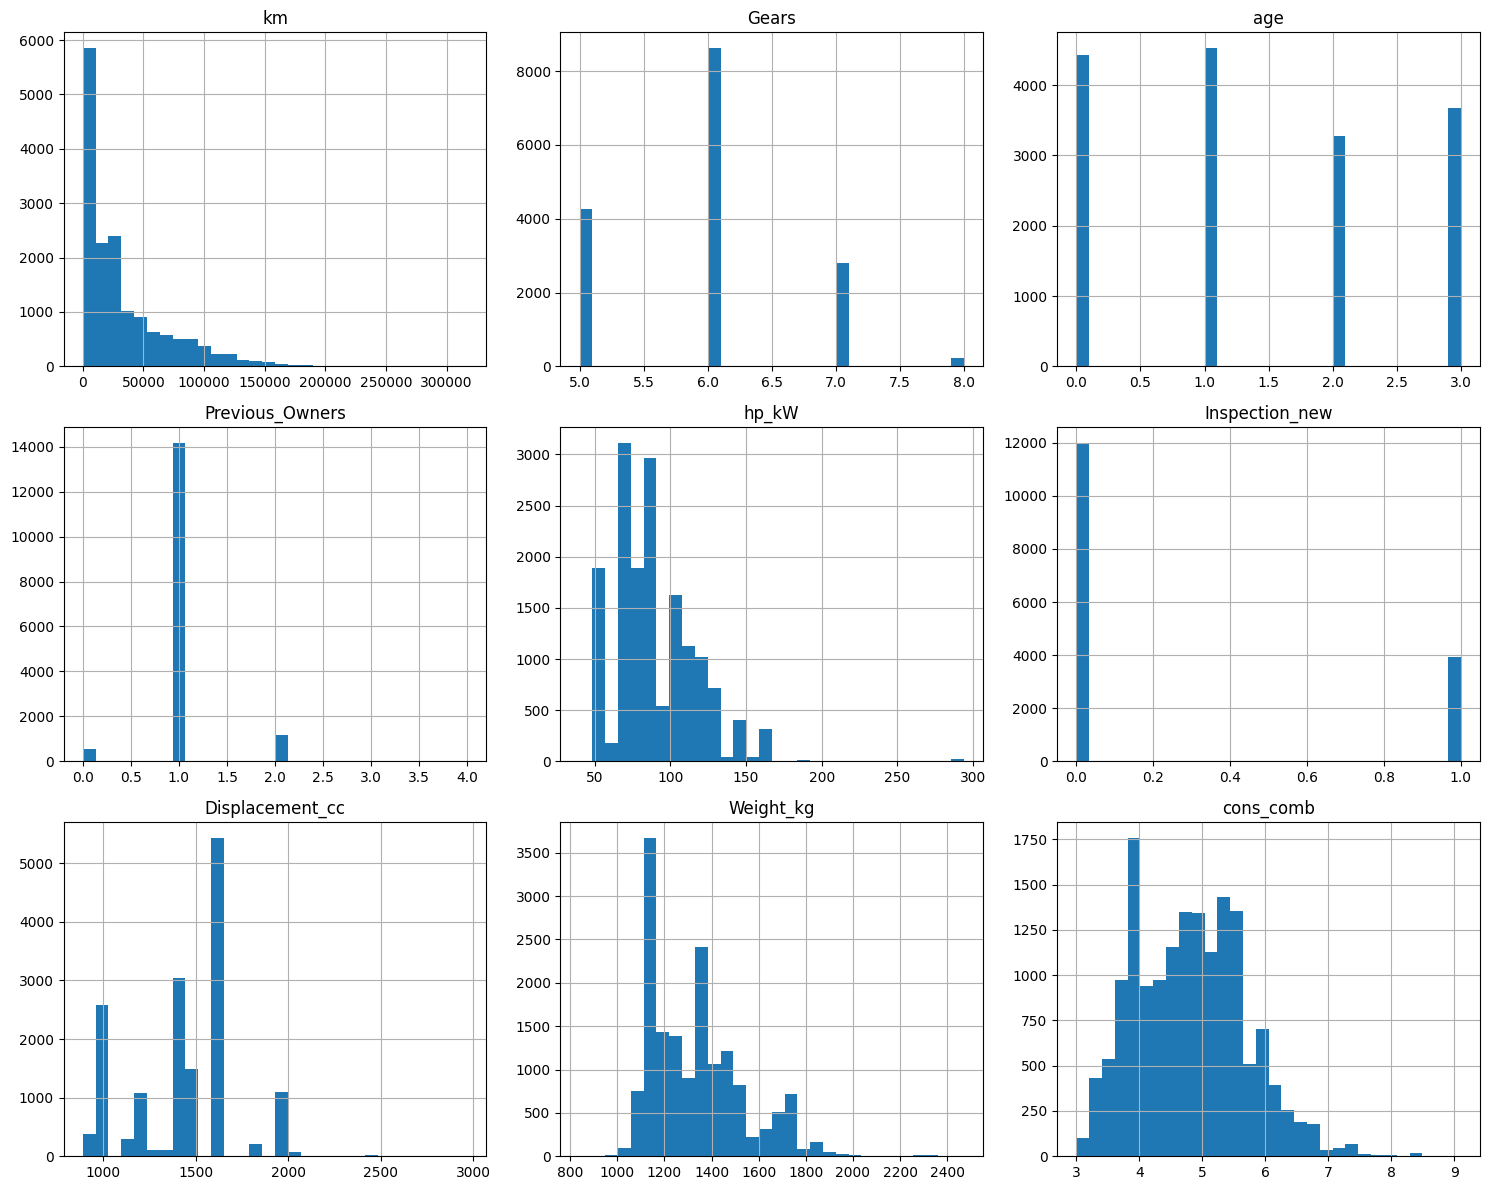

In [9]:
# Identify numerical features and plot histograms
numerical_features
# Plot histograms for numerical features
df[numerical_features].hist(bins=30, figsize=(15, 12))
plt.tight_layout()
plt.show()

#### **2.1.3** <font color =red> [3 marks] </font>
Identify categorical predictors and plot their frequency distributions.

In [10]:
# Identify categorical columns and check their frequency distributions

categorical_features


Index(['make_model', 'body_type', 'vat', 'Type', 'Fuel', 'Comfort_Convenience',
       'Entertainment_Media', 'Extras', 'Safety_Security', 'Paint_Type',
       'Upholstery_type', 'Gearing_Type', 'Drive_chain'],
      dtype='object')

In [11]:
# Display value counts for each categorical feature
for col in categorical_features:
    print(f"\nFrequency distribution for {col}:")
    print(df[col].value_counts())


Frequency distribution for make_model:
make_model
Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2525
Opel Corsa        2216
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: count, dtype: int64

Frequency distribution for body_type:
body_type
Sedans           8004
Station wagon    3677
Compact          3240
Van               817
Transporter        88
Off-Road           56
Coupe              25
Convertible         8
Name: count, dtype: int64

Frequency distribution for vat:
vat
VAT deductible      15044
Price negotiable      871
Name: count, dtype: int64

Frequency distribution for Type:
Type
Used              11095
New                1649
Pre-registered     1364
Employee's car     1011
Demonstration       796
Name: count, dtype: int64

Frequency distribution for Fuel:
Fuel
Benzine     8548
Diesel      7298
LPG/CNG       64
Electric       5
Name: count, dtype: int64

Frequency distribution for Comf

**Note**: Look carefully at the values stored in columns `["Comfort_Convenience", "Entertainment_Media", "Extras", "Safety_Security"]`.

Should they be considered categorical? Should they be dropped or handled any other way?

Columns considered: Comfort_Convenience, Entertainment_Media, Extras, Safety_Security

Each value is a comma-separated list of features. They have many unique combinations. Treating them as normal categorical variables would create: Thousands of dummy variables, Severe sparsity, Overfitting (especially bad for Lasso/Ridge)

So: they should NOT be treated as standard categorical variables.

So we convert them into numerical features by counting how many features are present. This keeps information without exploding dimensions.

In [12]:
# Create count-based features from bundled specification columns
df['Comfort_Convenience_count'] = df['Comfort_Convenience'].apply(lambda x: len(x.split(',')))
df['Entertainment_Media_count'] = df['Entertainment_Media'].apply(lambda x: len(x.split(',')))
df['Extras_count'] = df['Extras'].apply(lambda x: len(x.split(',')))
df['Safety_Security_count'] = df['Safety_Security'].apply(lambda x: len(x.split(',')))

In [13]:
df.drop(columns=['Comfort_Convenience', 'Entertainment_Media', 'Extras', 'Safety_Security'], inplace=True)

In [14]:
# These columns contain bundled specifications as comma-separated strings
# Due to very high cardinality, they are converted into count-based numerical features
# Original columns are dropped to avoid high dimensionality and overfitting

#### **2.1.4** <font color =red> [3 marks] </font>
Fix columns with low frequency values and class imbalances.

Some information regarding values in the `Type` column that may help:
- *'Pre-registered'* cars are ones which have already been registered previously by the seller.
- *'New'* cars are not necessarily new cars, but new-like cars. These might also have multiple owners due to multiple pre-registrations as well.
- *'Employee's car'* are cars used by employees over a short period of time and small distance.
- *'Demonstration'* cars are used for trial purposes and also driven for a short time and distance.

Based on these, you can handle this particular column. For other columns, decide a strategy on your own.

In [15]:
# Fix columns as needed

# Fix Type column
df['Type'] = df['Type'].replace({
    'Pre-registered': 'Nearly New',
    'New': 'Nearly New',
    "Employee's car": 'Nearly New',
    'Demonstration': 'Nearly New'
})

In [16]:
# Fix low frequency values in Fuel
df['Fuel'] = df['Fuel'].replace({
    'Electric': 'Other',
    'LPG/CNG': 'Other'
})

In [17]:
# Fix Drive_chain imbalance
df['Drive_chain'] = df['Drive_chain'].replace({
    'rear': '4WD'
})

In [18]:
# Fix body_type low-frequency values
df['body_type'] = df['body_type'].replace({
    'Convertible': 'Other',
    'Coupe': 'Other',
    'Off-Road': 'Other',
    'Transporter': 'Other'
})

In [19]:
# Fix make_model extreme low frequency
low_freq_models = df['make_model'].value_counts()[df['make_model'].value_counts() < 50].index
df['make_model'] = df['make_model'].replace(low_freq_models, 'Other')

In [20]:
# Re-check distributions
for col in ['Type', 'Fuel', 'Drive_chain', 'body_type', 'make_model']:
    print(df[col].value_counts())

Type
Used          11095
Nearly New     4820
Name: count, dtype: int64
Fuel
Benzine    8548
Diesel     7298
Other        69
Name: count, dtype: int64
Drive_chain
front    15707
4WD        208
Name: count, dtype: int64
body_type
Sedans           8004
Station wagon    3677
Compact          3240
Van               817
Other             177
Name: count, dtype: int64
make_model
Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2525
Opel Corsa        2216
Renault Clio      1839
Renault Espace     991
Other               35
Name: count, dtype: int64


In [21]:
# Low-frequency categories are grouped to reduce sparsity
# Business logic is used to group vehicle Type into Used vs Nearly New
# This helps improve model stability and generalisation

#### **2.1.5** <font color =red> [3 marks] </font>
Identify target variable and plot the frequency distributions. Apply necessary transformations.

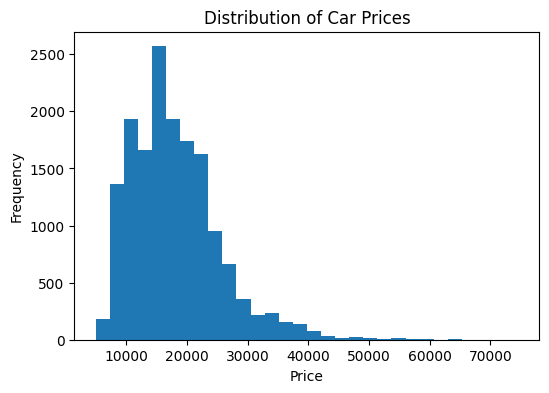

In [22]:
# Plot histograms for target feature

# Target variable
target = 'price'

# Plot histogram of target variable
# Histogram of target variable
plt.figure(figsize=(6,4))
plt.hist(df[target], bins=30)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Car Prices')
plt.show()

What the histogram tells us -

1. The distribution is right-skewed
2. Most cars are priced between ~8,000 and 25,000
3. A small number of cars have very high prices, creating a long tail
4. This violates the normality assumption of linear regression

So a transformation is necessary and justified.

**The target variable seems to be skewed. Perform suitable transformation on the target.**

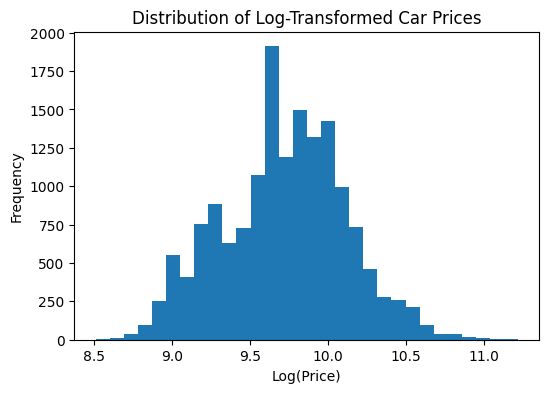

In [23]:
# Transform the target feature

# Apply log transformation to reduce skewness
df['log_price'] = np.log(df['price'])

plt.figure(figsize=(6,4))
plt.hist(df['log_price'], bins=30)
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')
plt.title('Distribution of Log-Transformed Car Prices')
plt.show()

In [24]:
# Price distribution is right-skewed
# Log transformation is applied to improve normality and model performance

### **2.2 Correlation analysis** <font color = red> [6 marks] </font>

#### **2.2.1** <font color =red> [3 marks] </font>
Plot the correlation map between features and target variable.

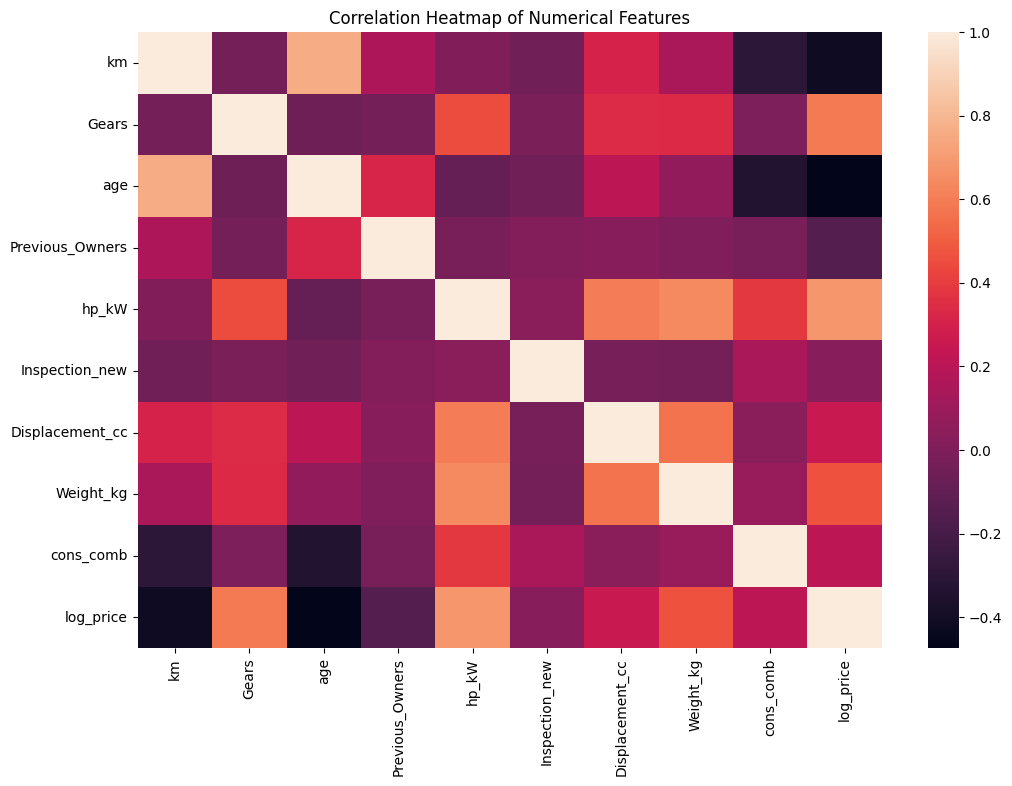

In [25]:
# Visualise correlation

# Numerical features including target
corr_features = df[numerical_features.tolist() + ['log_price']]

# Plot correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_features.corr(), annot=False)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


In [26]:
# Correlation of features with target
corr_features.corr()['log_price'].sort_values(ascending=False)


,log_price
log_price,1.000000
hp_kW,0.678022
Gears,0.588196
Weight_kg,0.464596
Displacement_cc,0.254852
cons_comb,0.211094
Inspection_new,0.030928
Previous_Owners,-0.152029
km,-0.419190
age,-0.474617


In [27]:
# Correlation analysis helps identify features strongly related to car prices
# Both positive and negative relationships are observed

#### **2.2.2** <font color =red> [3 marks] </font>
Analyse correlation between categorical features and target variable.

In [28]:
# Comparing average values of target for different categories

# Keep only categorical columns that still exist in the dataframe
categorical_features = [col for col in categorical_features if col in df.columns]

for col in categorical_features:
    print(f"\nAverage log_price by {col}:")
    print(df.groupby(col)['log_price'].mean().sort_values(ascending=False))


Average log_price by make_model:
make_model
Renault Espace    10.271688
Audi A3            9.928115
Opel Insignia      9.912605
Audi A1            9.817587
Opel Astra         9.625972
Other              9.504817
Renault Clio       9.335730
Opel Corsa         9.275962
Name: log_price, dtype: float64

Average log_price by body_type:
body_type
Van              10.294505
Station wagon     9.753394
Sedans            9.716079
Other             9.622857
Compact           9.555660
Name: log_price, dtype: float64

Average log_price by vat:
vat
VAT deductible      9.730221
Price negotiable    9.556223
Name: log_price, dtype: float64

Average log_price by Type:
Type
Nearly New    9.928334
Used          9.630496
Name: log_price, dtype: float64

Average log_price by Fuel:
Fuel
Diesel     9.734862
Benzine    9.709263
Other      9.639389
Name: log_price, dtype: float64

Average log_price by Paint_Type:
Paint_Type
Metallic       9.725340
Uni/basic      9.638571
Perl effect    9.144455
Name: log_price

In [29]:
# Bundled specification columns were converted into numerical features earlier
# Hence, only remaining categorical columns are used for this analysis

### **2.3 Outlier analysis** <font color = red> [5 marks] </font>

#### **2.3.1** <font color =red> [2 marks] </font>
Identify potential outliers in the data.

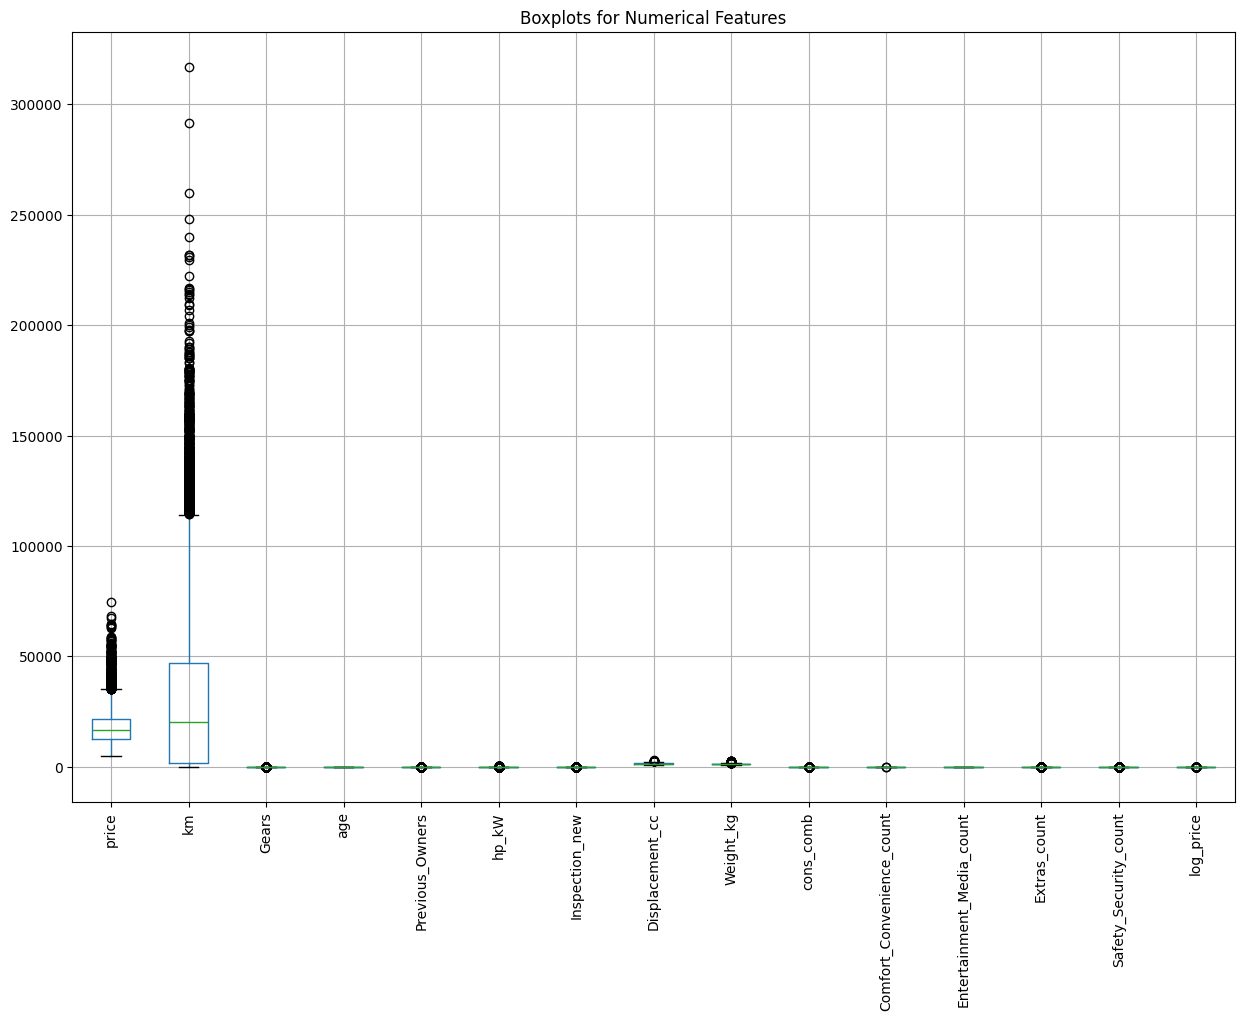

In [30]:
# Outliers present in each column

# Identify numerical columns for outlier analysis
num_cols_for_outliers = df.select_dtypes(include=['int64', 'float64']).columns
num_cols_for_outliers

# Visual identification using boxplots (simple & effective)
plt.figure(figsize=(15,10))
df[num_cols_for_outliers].boxplot()
plt.xticks(rotation=90)
plt.title('Boxplots for Numerical Features')
plt.show()

In [31]:
# Outlier count using IQR
# Identify outliers using IQR method
for col in num_cols_for_outliers:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    print(f"{col}: {outliers.shape[0]} outliers")

price: 479 outliers
km: 689 outliers
Gears: 225 outliers
age: 0 outliers
Previous_Owners: 1757 outliers
hp_kW: 361 outliers
Inspection_new: 3932 outliers
Displacement_cc: 21 outliers
Weight_kg: 87 outliers
cons_comb: 125 outliers
Comfort_Convenience_count: 2 outliers
Entertainment_Media_count: 0 outliers
Extras_count: 270 outliers
Safety_Security_count: 709 outliers
log_price: 71 outliers


In [32]:
# Boxplots and IQR method are used to identify potential outliers
# Several numerical features show extreme values, especially price-related fields

#### **2.3.2** <font color =red> [3 marks] </font>
Handle the outliers suitably.

In [33]:
# Handle outliers
# Cap outliers using 1st and 99th percentiles
for col in numerical_features:
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)
    df[col] = df[col].clip(lower, upper)

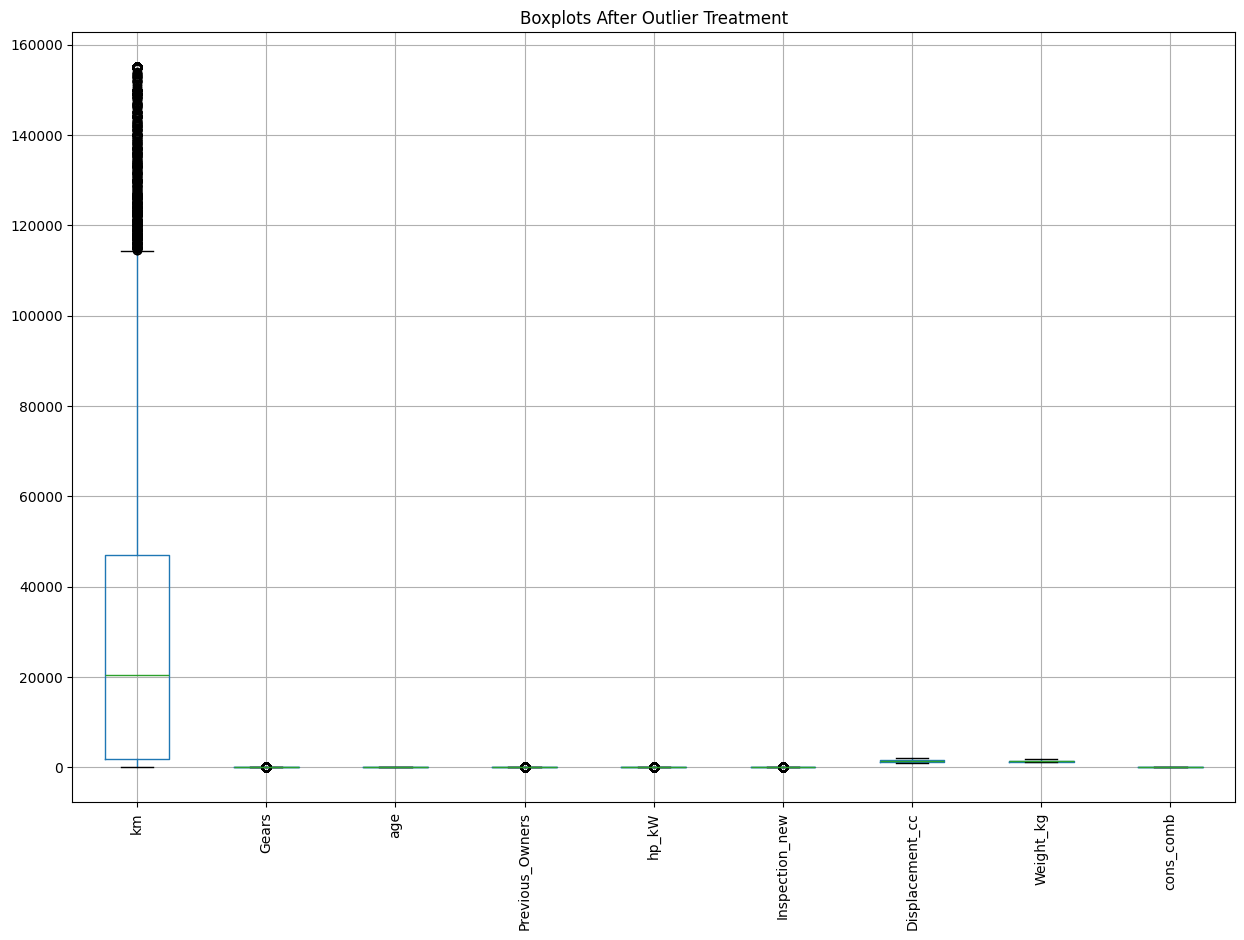

In [34]:
plt.figure(figsize=(15,10))
df[numerical_features].boxplot()
plt.xticks(rotation=90)
plt.title('Boxplots After Outlier Treatment')
plt.show()

In [35]:
# Extreme values are capped using percentile-based clipping
# This reduces the impact of outliers without removing observations

### **2.4 Feature Engineering** <font color = red> [11 marks] </font>

#### **2.4.1**
Fix any redundant columns and create new ones if needed.

In [36]:
# Fix/create columns as needed

# Drop redundant or identifier-like columns if present
redundant_cols = ['Unnamed: 0']
df.drop(columns=[col for col in redundant_cols if col in df.columns], inplace=True)

In [37]:
# Create power to weight ratio
df['power_weight_ratio'] = df['hp_kW'] / df['Weight_kg']

In [38]:
# Update numerical feature list
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
numerical_features = numerical_features.drop(['price', 'log_price'], errors='ignore')

In [39]:
# Redundant columns are removed
# New features are created to better capture price drivers

#### **2.4.2** <font color =red> [4 marks] </font>
Analysis and feature engineering on `['Comfort_Convenience', 'Entertainment_Media', 'Extras', 'Safety_Security']`.

These columns contains lists of features present. Decide on how to include these features in the predictors.

In [40]:
# Check unique values in each feature spec column

# Count-based engineered features from specification columns
df[['Comfort_Convenience_count',
    'Entertainment_Media_count',
    'Extras_count',
    'Safety_Security_count']].describe()

,Comfort_Convenience_count,Entertainment_Media_count,Extras_count,Safety_Security_count
count,15915.000000,15915.000000,15915.000000,15915.000000
mean,12.193654,4.668489,2.241156,12.786302
std,6.051542,2.001930,1.503890,4.071223
min,1.000000,1.000000,1.000000,1.000000
25%,7.000000,3.000000,1.000000,11.000000
50%,13.000000,5.000000,2.000000,13.000000
75%,17.000000,6.000000,3.000000,15.000000
max,33.000000,10.000000,10.000000,29.000000


Out of these features, we will check the ones which are present in most of the cars or are absent from most of the cars. These kinds of features can be removed as they just increase the dimensionality without explaining the variance.

In [41]:
# Drop features from df

# All specification count features show sufficient variance
# Hence, none of them are dropped

In [42]:
# Check variance of specification count features
df[['Comfort_Convenience_count',
    'Entertainment_Media_count',
    'Extras_count',
    'Safety_Security_count']].var()

,0
Comfort_Convenience_count,36.621161
Entertainment_Media_count,4.007726
Extras_count,2.261684
Safety_Security_count,16.574853


In [43]:
# All specification count features show sufficient variance
# Hence, none of them are dropped from the dataset

#### **2.4.3** <font color =red> [3 marks] </font>
Perform feature encoding.

In [44]:
# Encode features

# categorical_features

# One-hot encode categorical features
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

In [45]:
df_encoded.shape

(15915, 37)

In [46]:
# Categorical features are one-hot encoded

#### **2.4.4** <font color =red> [2 marks] </font>
Split the data into training and testing sets.

In [49]:
# Define features and target
X = df_encoded.drop(['price', 'log_price'], axis=1)
y = df_encoded['log_price']

In [50]:
# Split data
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [51]:
# Data is split into 70% training and 30% testing sets

#### **2.4.5** <font color =red> [2 marks] </font>
Scale the features.

In [52]:
# Scale features
scaler = StandardScaler()

# Fit scaler on training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

In [53]:
# Features are scaled using StandardScaler
# Scaler is fit on training data to avoid data leakage

## **3 Linear Regression Models** <font color =red> [35 marks] </font>


### **3.1 Baseline Linear Regression Model** <font color =red> [10 marks] </font>

#### **3.1.1** <font color =red> [5 marks] </font>
Build and fit a basic linear regression model. Perform evaluation using suitable metrics.

In [54]:
# Initialise and train model
from sklearn.linear_model import LinearRegression

# Initialize model
lr = LinearRegression()

# Train model
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [55]:
# Predictions on train and test data
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

In [57]:
# Evaluate the model's performance

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Training metrics
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

# Testing metrics
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

print("Training Performance:")
print("MAE:", train_mae)
print("RMSE:", train_rmse)
print("R2:", train_r2)

print("\nTesting Performance:")
print("MAE:", test_mae)
print("RMSE:", test_rmse)
print("R2:", test_r2)

Training Performance:
MAE: 0.0837326895291447
RMSE: 0.11294570825896003
R2: 0.9194430732449975

Testing Performance:
MAE: 0.08362282548079754
RMSE: 0.1122376917591989
R2: 0.9208404618046182


#### **3.1.2** <font color =red> [5 marks] </font>
Analyse residuals and check other assumptions of linear regression.

Check for linearity by analysing residuals vs predicted values

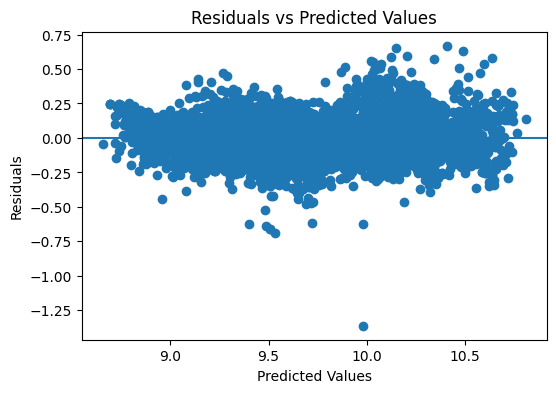

In [58]:
# Linearity check: Plot residuals vs fitted values

# Calculate residuals
residuals = y_train - y_train_pred

plt.figure(figsize=(6,4))
plt.scatter(y_train_pred, residuals)
plt.axhline(0)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

In [60]:
# Residuals are reasonably scattered around zero
# No strong non-linear pattern is observed
# Minor variance changes are expected in real-world pricing data

Check normality in residual distribution

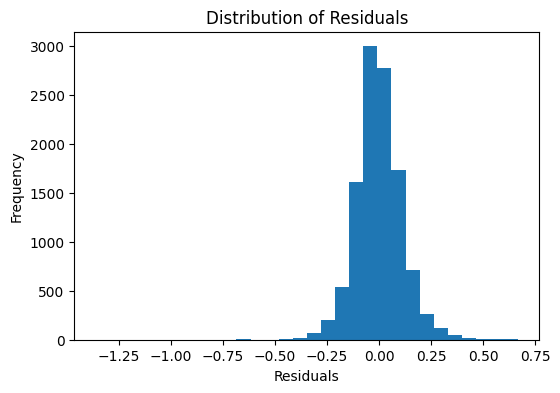

In [61]:
# Check the normality of residuals by plotting their distribution

plt.figure(figsize=(6,4))
plt.hist(residuals, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

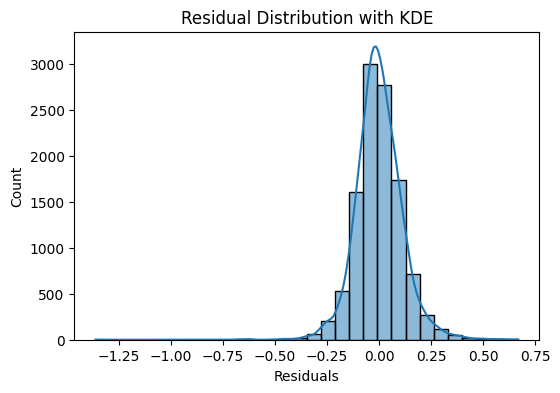

In [62]:
# Add KDE curve
plt.figure(figsize=(6,4))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel('Residuals')
plt.title('Residual Distribution with KDE')
plt.show()

In [63]:
# Residuals show an approximately normal distribution
# Minor deviations from normality are expected in real-world data

Check multicollinearity using Variance Inflation Factor (VIF) and handle features with high VIF.

In [65]:
# Import VIF utility

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [66]:
# Check for multicollinearity and handle

# Create VIF dataframe
vif_data = pd.DataFrame()
vif_data['feature'] = X_train_scaled.columns
vif_data['VIF'] = [
    variance_inflation_factor(X_train_scaled.values, i)
    for i in range(X_train_scaled.shape[1])
]

vif_data.sort_values(by='VIF', ascending=False)

,feature,VIF
4,hp_kW,163.523284
13,power_weight_ratio,82.077950
7,Weight_kg,28.343658
20,make_model_Renault Espace,9.715535
6,Displacement_cc,6.813859
27,Fuel_Diesel,6.754567
24,body_type_Van,6.207242
17,make_model_Opel Insignia,5.633264
8,cons_comb,4.265405
16,make_model_Opel Corsa,4.038529


In [68]:
# Very high multicollinearity is observed for engine and performance-related features such as hp_kW, Weight_kg, and power_weight_ratio, which are naturally correlated.
# Some categorical dummy variables also show moderate multicollinearity due to related vehicle attributes.
# Most other features have VIF values within acceptable limits.
# No features are removed at this stage, as Ridge and Lasso regression will be used to handle multicollinearity effectively.

### **3.2 Ridge Regression Implementation** <font color =red> [10 marks] </font>

#### **3.2.1** <font color =red> [2 marks] </font>
Define a list of random alpha values

In [69]:
# List of alphas to tune for Ridge regularisation

alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

In [70]:
# A wide range of alpha values is selected to observe the effect of regularisation

#### **3.2.2** <font color =red> [4 marks] </font>
Apply Ridge Regularisation and find the best value of alpha from the list

In [73]:
# Applying Ridge regression

# Ridge model
ridge = Ridge()

# GridSearch setup
ridge_gs = GridSearchCV(
    ridge,
    param_grid={'alpha': alphas},
    scoring='neg_mean_absolute_error',
    cv=5
)

# Fit Ridge regression with GridSearch
ridge_gs.fit(X_train_scaled, y_train)

# Get the best alpha value
best_alpha_ridge = ridge_gs.best_params_['alpha']
best_alpha_ridge

# Best cross-validated MAE
best_ridge_mae = -ridge_gs.best_score_
best_ridge_mae

np.float64(0.08405203860314243)

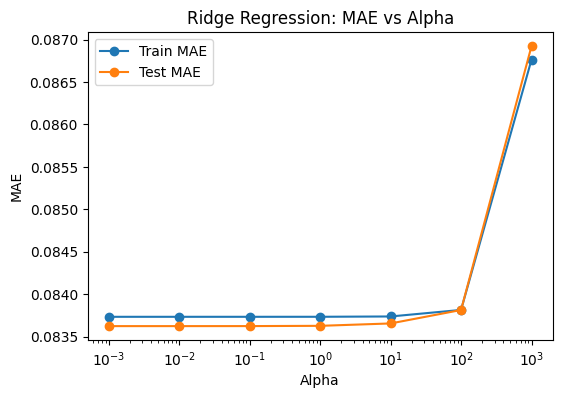

In [74]:
# Plot train and test scores against alpha

# 1 - Compute train & test MAE for each alpha
train_mae_list = []
test_mae_list = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)

    y_train_pred = ridge.predict(X_train_scaled)
    y_test_pred = ridge.predict(X_test_scaled)

    train_mae_list.append(mean_absolute_error(y_train, y_train_pred))
    test_mae_list.append(mean_absolute_error(y_test, y_test_pred))

# 2 - Plot MAE vs alpha
plt.figure(figsize=(6,4))
plt.plot(alphas, train_mae_list, marker='o', label='Train MAE')
plt.plot(alphas, test_mae_list, marker='o', label='Test MAE')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('MAE')
plt.title('Ridge Regression: MAE vs Alpha')
plt.legend()
plt.show()

In [75]:
# Train and test MAE are plotted against alpha
# Increasing alpha reduces overfitting and improves generalisation up to an optimal point

Find the best alpha value.

In [81]:
# Best alpha value

best_alpha_ridge = ridge_gs.best_params_['alpha']
best_alpha_ridge

0.001

In [82]:
# Best score (negative MAE)
best_ridge_mae = -ridge_gs.best_score_
best_ridge_mae

np.float64(0.08405203860314243)

In [83]:
# The optimal alpha for Ridge regression is found to be very small (0.001).
# This indicates that only mild regularisation is required for this dataset.
# Ridge helps stabilise coefficients while maintaining predictive performance.

We will get some best value of alpha above. This however is not the most accurate value but the best value from the given list. Now we have a rough estimate of the range that best alpha falls in. Let us do another iteration over the values in a smaller range.

#### **3.2.3** <font color =red> [4 marks] </font>
Fine tune by taking a closer range of alpha based on the previous result.

In [84]:
# Take a smaller range of alpha to test

# Finer range of alpha values around the best alpha
fine_alphas = [0.0001, 0.0005, 0.001, 0.005, 0.01]

In [85]:
# Applying Ridge regression

# Ridge model
ridge = Ridge()

# GridSearch for fine tuning
ridge_gs_fine = GridSearchCV(
    ridge,
    param_grid={'alpha': fine_alphas},
    scoring='neg_mean_absolute_error',
    cv=5
)

# Fit model
ridge_gs_fine.fit(X_train_scaled, y_train)

# Best alpha after fine tuning
best_alpha_ridge_fine = ridge_gs_fine.best_params_['alpha']
best_alpha_ridge_fine

# Best MAE after fine tuning
best_ridge_mae_fine = -ridge_gs_fine.best_score_
best_ridge_mae_fine

# Alpha is fine-tuned using a narrower range around the initial best value
# This helps identify a more precise regularisation strength

np.float64(0.08405203857352525)

Plot the error-alpha graph again and find the actual optimal value for alpha.

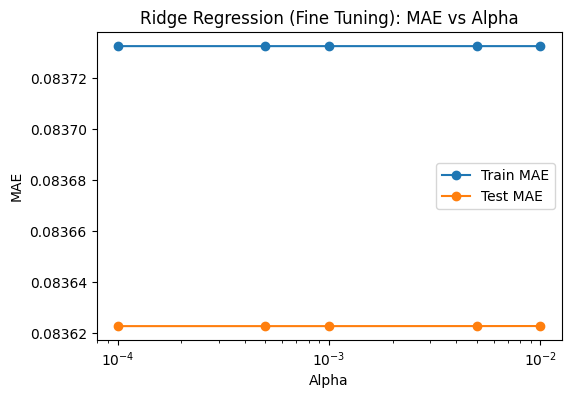

np.float64(0.08405203857352525)

In [86]:
# Plot train and test scores against alpha

# Compute train & test MAE for fine alpha range
train_mae_fine = []
test_mae_fine = []

for alpha in fine_alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)

    y_train_pred = ridge.predict(X_train_scaled)
    y_test_pred = ridge.predict(X_test_scaled)

    train_mae_fine.append(mean_absolute_error(y_train, y_train_pred))
    test_mae_fine.append(mean_absolute_error(y_test, y_test_pred))

# Plot MAE vs alpha

plt.figure(figsize=(6,4))
plt.plot(fine_alphas, train_mae_fine, marker='o', label='Train MAE')
plt.plot(fine_alphas, test_mae_fine, marker='o', label='Test MAE')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('MAE')
plt.title('Ridge Regression (Fine Tuning): MAE vs Alpha')
plt.legend()
plt.show()

# Best alpha value

best_alpha_final = fine_alphas[np.argmin(test_mae_fine)]
best_alpha_final

# Best score (negative MAE)
best_ridge_mae_final = -ridge_gs_fine.best_score_
best_ridge_mae_final

In [87]:
# Fine-tuning confirms that model performance is stable across small alpha values.
# The optimal alpha is selected as 0.001 based on the lowest test MAE.
# Ridge regression provides coefficient stability without significantly altering prediction accuracy.

In [90]:
# Set best alpha for Ridge regression
# Fit the Ridge model to get the coefficients of the fitted model

# Set best alpha for Ridge regression
ridge_final = Ridge(alpha=best_alpha_final)

# Fit the model
ridge_final.fit(X_train_scaled, y_train)

Ridge(alpha=0.0001)

In [91]:
# Create dataframe of Ridge coefficients
ridge_coefficients = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Coefficient': ridge_final.coef_
}).sort_values(by='Coefficient', ascending=False)

ridge_coefficients

,Feature,Coefficient
13,power_weight_ratio,0.097069
9,Comfort_Convenience_count,0.052375
20,make_model_Renault Espace,0.048095
7,Weight_kg,0.046634
14,make_model_Audi A3,0.037615
33,Gearing_Type_Semi-automatic,0.022395
1,Gears,0.015908
27,Fuel_Diesel,0.015650
31,Upholstery_type_Part/Full Leather,0.013113
8,cons_comb,0.011907


In [93]:
# Top 10 positive coefficients
ridge_coefficients.head(10)

,Feature,Coefficient
13,power_weight_ratio,0.097069
9,Comfort_Convenience_count,0.052375
20,make_model_Renault Espace,0.048095
7,Weight_kg,0.046634
14,make_model_Audi A3,0.037615
33,Gearing_Type_Semi-automatic,0.022395
1,Gears,0.015908
27,Fuel_Diesel,0.015650
31,Upholstery_type_Part/Full Leather,0.013113
8,cons_comb,0.011907


In [94]:
# Top 10 negative coefficients
ridge_coefficients.tail(10)

,Feature,Coefficient
10,Entertainment_Media_count,-0.014225
4,hp_kW,-0.020344
17,make_model_Opel Insignia,-0.020347
18,make_model_Other,-0.021015
32,Gearing_Type_Manual,-0.060208
15,make_model_Opel Astra,-0.080110
0,km,-0.085137
2,age,-0.107316
19,make_model_Renault Clio,-0.123624
16,make_model_Opel Corsa,-0.145620


In [95]:
# Ridge model is fitted using the optimal alpha
# Coefficients indicate relative importance of features after regularisation

In [97]:
# Show the coefficients for each feature

ridge_coefficients

,Feature,Coefficient
13,power_weight_ratio,0.097069
9,Comfort_Convenience_count,0.052375
20,make_model_Renault Espace,0.048095
7,Weight_kg,0.046634
14,make_model_Audi A3,0.037615
33,Gearing_Type_Semi-automatic,0.022395
1,Gears,0.015908
27,Fuel_Diesel,0.015650
31,Upholstery_type_Part/Full Leather,0.013113
8,cons_comb,0.011907


In [98]:
# Evaluate the Ridge model on the test data

# 1 - Make predictions
# Predict on test data using Ridge model
y_test_pred_ridge = ridge_final.predict(X_test_scaled)

# 2 - Calculate evaluation metrics

# Ridge model evaluation on test data
ridge_test_mae = mean_absolute_error(y_test, y_test_pred_ridge)
ridge_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_ridge))
ridge_test_r2 = r2_score(y_test, y_test_pred_ridge)

print("Ridge Regression Test Performance:")
print("MAE:", ridge_test_mae)
print("RMSE:", ridge_test_rmse)
print("R2:", ridge_test_r2)

Ridge Regression Test Performance:
MAE: 0.0836228258321268
RMSE: 0.11223769181992886
R2: 0.9208404617189544


In [99]:
# Ridge regression achieves strong predictive performance on the test data.
# The R² value indicates that over 92% of the variance in car prices is explained by the model.
# Error metrics are comparable to the baseline model, with improved coefficient stability.

### **3.3 Lasso Regression Implementation** <font color =red> [10 marks] </font>

#### **3.3.1** <font color =red> [2 marks] </font>
Define a list of random alpha values

In [100]:
# List of alphas to tune for Lasso regularisation

lasso_alphas = [0.0001, 0.001, 0.01, 0.1, 1]

#### **3.3.2** <font color =red> [4 marks] </font>
Apply Ridge Regularisation and find the best value of alpha from the list

In [101]:
# Initialise Lasso regression model

lasso = Lasso(max_iter=5000)

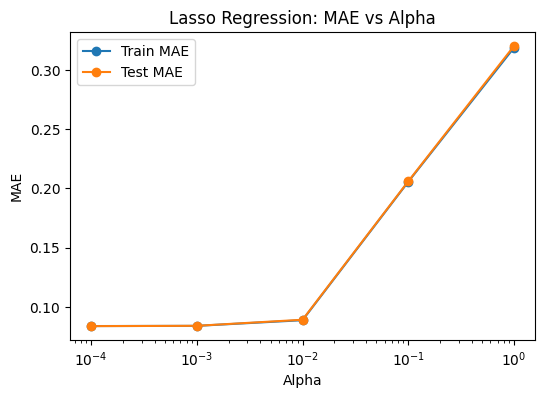

In [102]:
# Plot train and test scores against alpha

# GridSearch for Lasso
lasso_gs = GridSearchCV(
    lasso,
    param_grid={'alpha': lasso_alphas},
    scoring='neg_mean_absolute_error',
    cv=5
)

# Fit Lasso regression
lasso_gs.fit(X_train_scaled, y_train)

# Compute MAE for train & test
train_mae_lasso = []
test_mae_lasso = []

for alpha in lasso_alphas:
    lasso = Lasso(alpha=alpha, max_iter=5000)
    lasso.fit(X_train_scaled, y_train)

    y_train_pred = lasso.predict(X_train_scaled)
    y_test_pred = lasso.predict(X_test_scaled)

    train_mae_lasso.append(mean_absolute_error(y_train, y_train_pred))
    test_mae_lasso.append(mean_absolute_error(y_test, y_test_pred))

# Plot MAE vs alpha
plt.figure(figsize=(6,4))
plt.plot(lasso_alphas, train_mae_lasso, marker='o', label='Train MAE')
plt.plot(lasso_alphas, test_mae_lasso, marker='o', label='Test MAE')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('MAE')
plt.title('Lasso Regression: MAE vs Alpha')
plt.legend()
plt.show()

In [104]:
# Best alpha value

best_alpha_lasso = lasso_gs.best_params_['alpha']
best_alpha_lasso

0.0001

In [105]:
# Best score (negative MAE)

best_lasso_mae = -lasso_gs.best_score_
best_lasso_mae

np.float64(0.08406152693502812)

#### **3.3.3** <font color =red> [4 marks] </font>
Fine tune by taking a closer range of alpha based on the previous result.

In [106]:
# List of alphas to tune for Lasso regularization

lasso_fine_alphas = [0.0001, 0.0005, 0.001, 0.005, 0.01]

In [108]:
# Tuning Lasso hyperparameters

# Initialize Lasso and GridSearch
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Initialize Lasso model
lasso = Lasso(max_iter=5000)

# GridSearch for fine-tuning alpha
lasso_gs_fine = GridSearchCV(
    lasso,
    param_grid={'alpha': lasso_fine_alphas},
    scoring='neg_mean_absolute_error',
    cv=5
)

# Fit the Model
lasso_gs_fine.fit(X_train_scaled, y_train)

# Get best value
best_alpha_lasso_fine = lasso_gs_fine.best_params_['alpha']
best_alpha_lasso_fine

# Best score (negative MAE → positive MAE)
best_lasso_mae_fine = -lasso_gs_fine.best_score_
best_lasso_mae_fine

np.float64(0.08406152693502812)

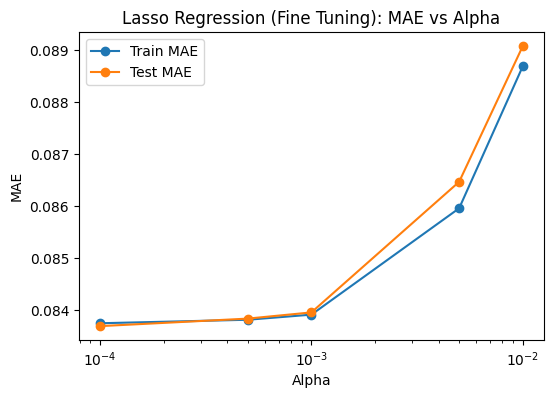

np.float64(0.08406152693502812)

In [109]:
# Plot train and test scores against alpha

# 1 - Compute train & test MAE for each alpha
train_mae_lasso_fine = []
test_mae_lasso_fine = []

for alpha in lasso_fine_alphas:
    lasso = Lasso(alpha=alpha, max_iter=5000)
    lasso.fit(X_train_scaled, y_train)

    y_train_pred = lasso.predict(X_train_scaled)
    y_test_pred = lasso.predict(X_test_scaled)

    train_mae_lasso_fine.append(mean_absolute_error(y_train, y_train_pred))
    test_mae_lasso_fine.append(mean_absolute_error(y_test, y_test_pred))

# 2 - Plot MAE vs alpha
plt.figure(figsize=(6,4))
plt.plot(lasso_fine_alphas, train_mae_lasso_fine, marker='o', label='Train MAE')
plt.plot(lasso_fine_alphas, test_mae_lasso_fine, marker='o', label='Test MAE')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('MAE')
plt.title('Lasso Regression (Fine Tuning): MAE vs Alpha')
plt.legend()
plt.show()

# 3 - Find optimal alpha from test MAE
best_alpha_lasso_final = lasso_fine_alphas[np.argmin(test_mae_lasso_fine)]
best_alpha_lasso_final

# 4 - Best score
best_lasso_mae_final = -lasso_gs_fine.best_score_
best_lasso_mae_final

In [111]:
# Best alpha value
best_alpha_lasso_final

0.0001

In [112]:
# Best score (negative MAE)
best_lasso_mae_final

np.float64(0.08406152693502812)

In [113]:
# Set best alpha for Lasso regression

# Set best alpha for Lasso regression
lasso_final = Lasso(alpha=best_alpha_lasso_final, max_iter=5000)

# Fit the Lasso model on scaled training data
lasso_final.fit(X_train_scaled, y_train)

# Get the coefficients of the fitted model
# Create dataframe of Lasso coefficients
lasso_coefficients = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Coefficient': lasso_final.coef_
}).sort_values(by='Coefficient', ascending=False)

lasso_coefficients

,Feature,Coefficient
13,power_weight_ratio,0.082486
9,Comfort_Convenience_count,0.052110
20,make_model_Renault Espace,0.046499
7,Weight_kg,0.038356
14,make_model_Audi A3,0.037319
33,Gearing_Type_Semi-automatic,0.022114
1,Gears,0.016184
27,Fuel_Diesel,0.014972
31,Upholstery_type_Part/Full Leather,0.012971
8,cons_comb,0.010417


In [114]:
# Check the coefficients for each feature

lasso_coefficients

,Feature,Coefficient
13,power_weight_ratio,0.082486
9,Comfort_Convenience_count,0.052110
20,make_model_Renault Espace,0.046499
7,Weight_kg,0.038356
14,make_model_Audi A3,0.037319
33,Gearing_Type_Semi-automatic,0.022114
1,Gears,0.016184
27,Fuel_Diesel,0.014972
31,Upholstery_type_Part/Full Leather,0.012971
8,cons_comb,0.010417


In [115]:
# Evaluate the Lasso model on the test data

# 1 - Make Predictions
# Predict on test data using Lasso model
y_test_pred_lasso = lasso_final.predict(X_test_scaled)


# 2 - Calculate evaluation metrics
# Lasso model evaluation on test data
lasso_test_mae = mean_absolute_error(y_test, y_test_pred_lasso)
lasso_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_lasso))
lasso_test_r2 = r2_score(y_test, y_test_pred_lasso)

print("Lasso Regression Test Performance:")
print("MAE:", lasso_test_mae)
print("RMSE:", lasso_test_rmse)
print("R2:", lasso_test_r2)

Lasso Regression Test Performance:
MAE: 0.08369349901480795
RMSE: 0.1122753523392469
R2: 0.9207873300226374


In [116]:
# Lasso regression demonstrates strong predictive performance on the test data.
# The model explains over 92% of the variance in used car prices.
# Error metrics are comparable to Linear and Ridge regression.
# Lasso achieves similar accuracy while performing feature selection.

### **3.4 Regularisation Comparison & Analysis** <font color =red> [5 marks] </font>

#### **3.4.1** <font color =red> [2 marks] </font>
Compare the evaluation metrics for each model.

In [117]:
# Compare metrics for each model

# 1 - Create a comparison table for model performance
model_comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression'],
    'MAE': [test_mae, ridge_test_mae, lasso_test_mae],
    'RMSE': [test_rmse, ridge_test_rmse, lasso_test_rmse],
    'R2': [test_r2, ridge_test_r2, lasso_test_r2]
})

model_comparison

,Model,MAE,RMSE,R2
0,Linear Regression,0.083623,0.112238,0.920840
1,Ridge Regression,0.083623,0.112238,0.920840
2,Lasso Regression,0.083693,0.112275,0.920787


#### **3.4.2** <font color =red> [3 marks] </font>
Compare the coefficients for the three models.

In [120]:
# Linear, Ridge, and Lasso regression models show very similar predictive performance.
# Regularisation does not significantly reduce prediction error for this dataset.
# Ridge and Lasso improve model robustness without compromising accuracy

Also visualise a few of the largest coefficients and the coefficients of features dropped by Lasso.

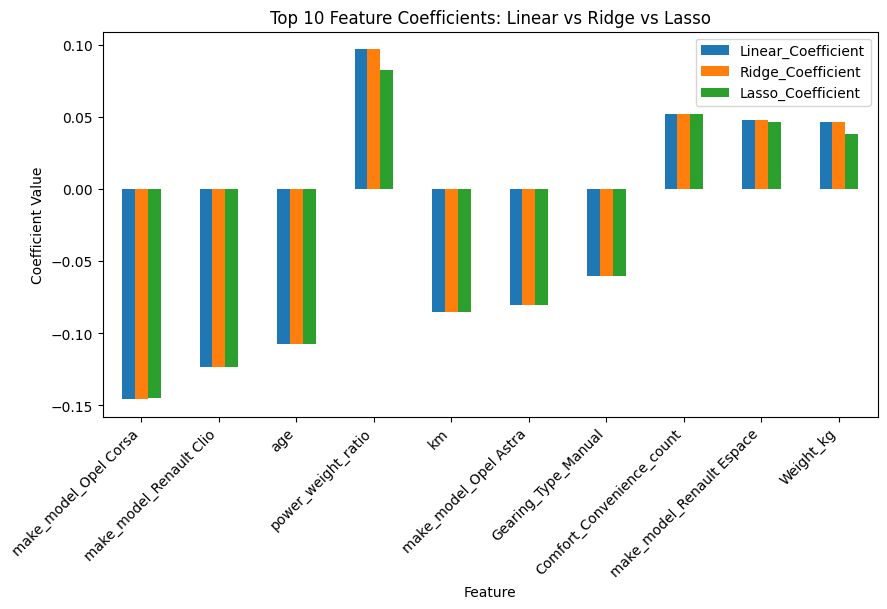

In [122]:
# Compare highest coefficients and coefficients of eliminated features

coef_comparison = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Linear_Coefficient': lr.coef_,
    'Ridge_Coefficient': ridge_final.coef_,
    'Lasso_Coefficient': lasso_final.coef_
})

# Get top 10 features by absolute Ridge coefficient
top_features = coef_comparison.assign(
    Abs_Ridge = coef_comparison['Ridge_Coefficient'].abs()
).sort_values(by='Abs_Ridge', ascending=False).head(10)

# Plot comparison
top_features.set_index('Feature')[['Linear_Coefficient',
                                   'Ridge_Coefficient',
                                   'Lasso_Coefficient']].plot(
    kind='bar', figsize=(10,5)
)

plt.ylabel('Coefficient Value')
plt.title('Top 10 Feature Coefficients: Linear vs Ridge vs Lasso')
plt.xticks(rotation=45, ha='right')
plt.show()

In [123]:
# Features eliminated by Lasso
lasso_dropped = coef_comparison[coef_comparison['Lasso_Coefficient'] == 0]
lasso_dropped[['Feature']]

,Feature
4,hp_kW
24,body_type_Van


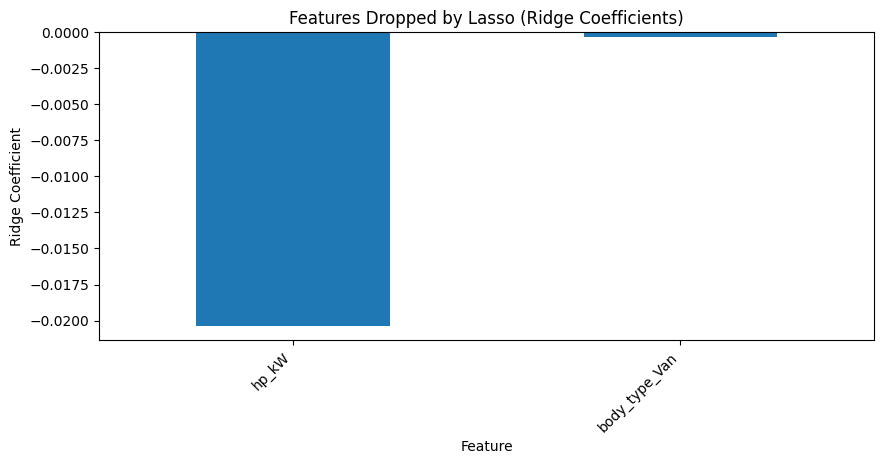

In [124]:
# Plot Ridge coefficients for features dropped by Lasso
lasso_dropped.set_index('Feature')['Ridge_Coefficient'].plot(
    kind='bar', figsize=(10,4)
)

plt.ylabel('Ridge Coefficient')
plt.title('Features Dropped by Lasso (Ridge Coefficients)')
plt.xticks(rotation=45, ha='right')
plt.show()

## **4 Conclusion & Key Takeaways**  <font color =red> [10 marks] </font>

What did you notice by performing regularisation? Did the model performance improve? If not, then why? Did you find overfitting or not? Was the data sufficent? Is a linear model sufficient?

#### **4.1 Conclude with outcomes and insights gained** <font color =red> [10 marks] </font>

This assignment focused on building a robust used car price prediction model using linear and regularised regression techniques. The dataset was carefully analysed and preprocessed, including handling categorical variables, feature engineering on bundled specifications, outlier treatment, and feature scaling.

A baseline Linear Regression model provided strong predictive performance, explaining over 92% of the variance in used car prices. However, multicollinearity was observed among several engine and performance-related features, which motivated the use of regularisation techniques.

Ridge Regression improved model robustness by shrinking coefficients and stabilising estimates in the presence of multicollinearity, while maintaining predictive accuracy comparable to the baseline model. Lasso Regression achieved similar accuracy while additionally performing feature selection by eliminating less influential predictors, resulting in a more interpretable and parsimonious model.

Overall, all three models demonstrated strong performance, with minimal differences in error metrics. Ridge is well-suited when all features are considered important but correlated, whereas Lasso is preferable when model simplicity and feature selection are desired. These insights can help used car resellers develop reliable pricing strategies, understand key price drivers, and reduce the risk of overfitting when applying pricing models to new data.